# 4 Visualizing Rules

In [1]:
# import packages
import random
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# import rating dataset
rating = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv')
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


In [2]:
# import books dataset
books = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv')
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [3]:
# merge books title
rating = rating.merge(books[['book_id', 'original_title']], how='left')\
               .drop(['book_id', 'rating'], axis=1).dropna()

In [4]:
rating.head()

,user_id,original_title
0,1,La sombra del viento
2,2,How to Win Friends and Influence People
3,2,Das Drama des begabten Kindes und die Suche na...
4,2,The Millionaire Next Door: The Surprising Secr...
5,2,The Da Vinci Code


In [5]:
# Recover unique user IDs.
user_id = rating['user_id'].unique()

# randomly choice 200 users
user_id = random.choices(user_id, k=200)

# Create library of highly rated books for each user.
libraries = [list(rating[rating['user_id'] == u].original_title) for u in user_id]

# Print example library.
print(libraries[0])

['An Excellent conceited Tragedie of Romeo and Juliet', 'Nineteen Eighty-Four', 'A Clockwork Orange', "One Flew Over the Cuckoo's Nest", 'Animal Farm: A Fairy Story', 'Lord of the Flies ', 'The Taming of the Shrew', 'The Tempest', 'Dracula', 'The Picture of Dorian Gray', 'Brave New World', 'The Hobbit or There and Back Again', 'The Great Hunt', "Magician's Gambit", 'The Voyage of the Dawn Treader', 'Watchmen', 'V for Vendetta', 'Män som hatar kvinnor', 'Angels & Demons ', "Harry Potter and the Philosopher's Stone", ' The Fellowship of the Ring', 'A Game of Thrones', 'Northern Lights', 'Eragon', 'Towers of Midnight', 'Before They Are Hanged', 'Red Seas Under Red Skies', 'The Dragon Reborn ', "Enchanters' End Game", 'The Elfstones Of Shannara', 'Castle of Wizardry', 'The Lion, the Witch and the Wardrobe', 'The Eye of the World', 'The Princess Bride', 'Good Omens: The Nice and Accurate Prophecies of Agnes Nutter, Witch', 'Neverwhere Graphic Novel', 'The Colour of Magic', 'The Hunger Games

In [6]:
# Instantiate transaction encoder.
encoder = TransactionEncoder()

# One-hot encode libraries.
onehot = encoder.fit(libraries).transform(libraries)

# Use movie titles as column headers.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# take only 1000 random books
onehot = onehot[random.choices(onehot.columns, k=1000)]

# Print onehot header.
onehot.head()

,The Prodigal God: Christianity Redefined Through the Parable of the Prodigal Sons,How We Decide,Доктор Живаго,Girl Online,When We Were Very Young,The Odessa File,Beauty Queens,Queen of Babble in the Big City,Twilight: The Complete Illustrated Movie Companion,The Atlantis Gene,...,Velocity,Personal,The Beach House,Brüder Grimm: Kinder- und Hausmärchen,Pale Blue Dot: A Vision of the Human Future in Space,Red Seas Under Red Skies,The Penultimate Peril,Pushing the Limits,The Once and Future King,The Storyteller
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Visualizing itemset support
---
A content-streaming start-up has approached you for consulting services. To keep licensing fees low, they want to assemble a narrow library of movies that all appeal to the same audience. While they'll provide a smaller selection of content than the big players in the industry, they'll also be able to offer a low subscription fee.

You decide to use the MovieLens data and a heatmap for this project. Using a simple support-based heatmap will allow you to identify individual titles that have high support with other titles.

In [7]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori, association_rules 

# Compute frequent itemsets using a minimum support of 0.07
frequent_itemsets = apriori(onehot, min_support = 0.07, 
                            use_colnames = True, max_len = 2)

# Compute the association rules
rules = association_rules(frequent_itemsets, metric = 'support', 
                          min_threshold = 0.0)

## Heatmaps with lift
---
The founder likes the heatmap you've produced for her streaming service. After discussing the project further, however, you decide that that it is important to examine other metrics before making a final decision on which movies to license. In particular, the founder suggests that you select a metric that tells you whether the support values are higher than we would expect given the films' individual support values.

You recall that lift does this well and decide to use it as a metric. You also remember that lift has an important threshold at 1.0 and decide that it is important to replace the colorbar with annotations, so you can determine whether a value is greater than 1.0. 

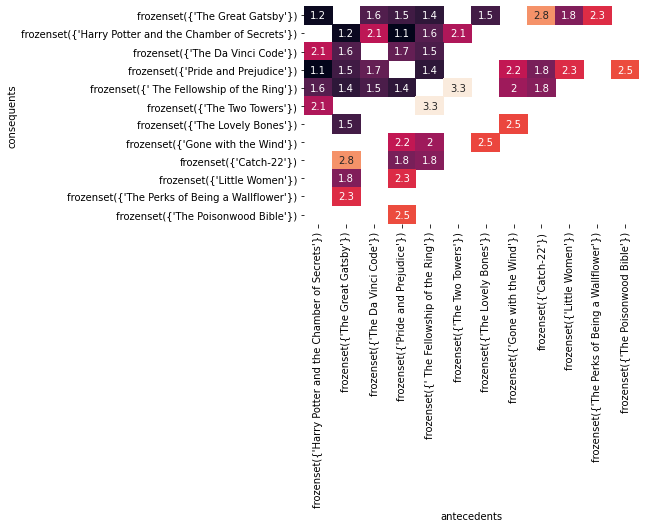

In [8]:
# Import seaborn under its standard alias
import seaborn as sns
import matplotlib.pyplot as plt

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'consequents', 
                   columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True, cbar = False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Pruning with scatterplots
---
After viewing your Batman-based streaming service proposal from the previous exercise, the founder realizes that her initial plan may have been too narrow. Rather than focusing on initial titles, she asks you to focus on general patterns in the association rules and then perform pruning accordingly. Your goal should be to identify a large set of strong associations.

Fortunately, you've just learned how to generate scatterplots. You decide to start by plotting support and confidence, since all optimal rules according to many common metrics are located on the confidence-supply border. 

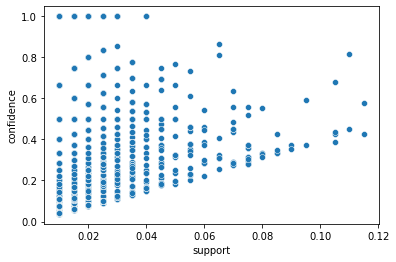

In [9]:
# Apply the Apriori algorithm with a support value of 0.0075
frequent_itemsets = apriori(onehot, min_support = 0.0075, 
                            use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric = 'support', 
                          min_threshold = 0.0)

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", data = rules)
plt.show()

## Optimality of the support-confidence border
---
You return to the founder with the scatterplot produced in the previous exercise and ask whether she would like you to use pruning to recover the support-confidence border. You tell her about the Bayardo-Agrawal result, but she seems skeptical and asks whether you can demonstrate this in an example.

Recalling that scatterplots can scale the size of dots according to a third metric, you decide to use that to demonstrate optimality of the support-confidence border. You will show this by scaling the dot size using the lift metric, which was one of the metrics to which Bayardo-Agrawal applies.

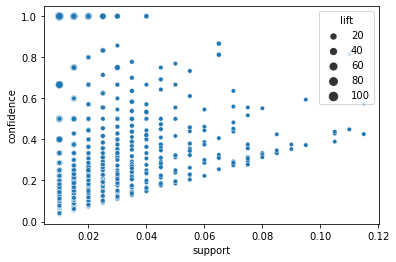

In [10]:
# Import seaborn under its standard alias
import seaborn as sns

# Apply the Apriori algorithm with a support value of 0.0075
frequent_itemsets = apriori(onehot, min_support = 0.0075, 
                         use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric = "support", 
                          min_threshold = 0.0)

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.show()

## Using parallel coordinates to visualize rules
---
Your visual demonstration in the previous exercise convinced the founder that the supply-confidence border is worthy of further exploration. She now suggests that you extract part of the border and visualize it. Since the rules that fall on the border are strong with respect to most common metrics, she argues that you should simply visualize whether a rule exists, rather than the intensity of the rule according to some metric.

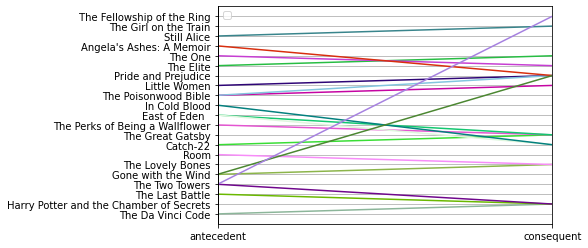

In [11]:
from pandas.plotting import parallel_coordinates

# Compute the frequent itemsets
frequent_itemsets = apriori(onehot, min_support = 0.05, 
                         use_colnames = True, max_len = 2)

# Compute rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric = 'confidence', 
                          min_threshold = 0.50)

# Convert rules into coordinates suitable for use in a parallel coordinates plot
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index

coords = rules[['antecedent','consequent', 'rule']]

# Generate parallel coordinates plot
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.show()